## Figure 3a

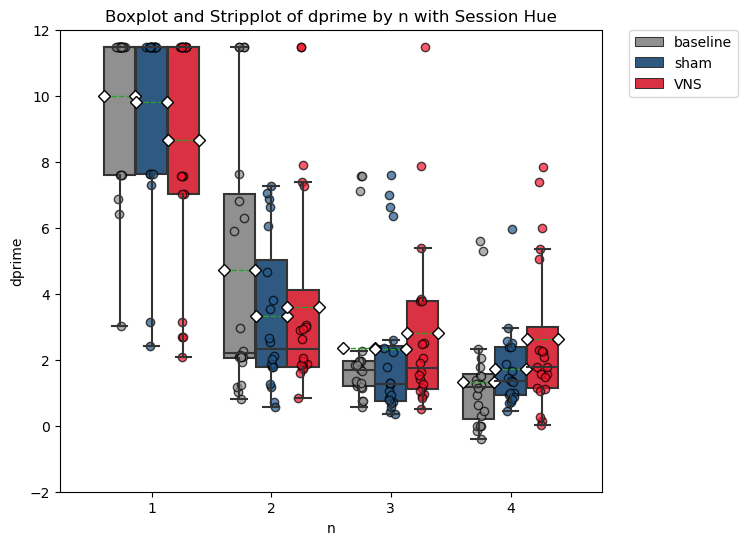

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_filename = 'performance_sum.txt'
df = pd.read_csv(df_filename)
df_selected_n = df[df['n'].isin([1, 2, 3, 4])]
session_order = ['baseline', 'sham', 'VNS']
session_palette = {
    'VNS': '#F6162C',
    'sham': '#22598D',
    'baseline': '#909090'
}


fig, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(ax=ax, data=df_selected_n, x='n', y='dprime', hue='session', hue_order=session_order, palette=session_palette, 
            showfliers=False, 
            showmeans=True, 
            meanline=True,
            meanprops={"marker":"D","markerfacecolor":"white", "markeredgecolor":"black", "linestyle":"--"})


for i, session in enumerate(session_order):
    session_data = df_selected_n[df_selected_n['session'] == session]
    for n_val in session_data['n'].unique():
        y_vals = session_data[session_data['n'] == n_val]['dprime']
        x_vals = np.random.normal(loc=n_val - 1 + i * 0.26 - 0.26, scale=0.02, size=len(y_vals))
        ax.scatter(x_vals, y_vals, color=session_palette[session], alpha=0.7, edgecolor='black')


plt.ylim([-2, 12])

handles, labels = plt.gca().get_legend_handles_labels()
l = plt.legend(handles[0:len(session_order)], labels[0:len(session_order)], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Boxplot and Stripplot of dprime by n with Session Hue')
plt.show()

## Figure 3b

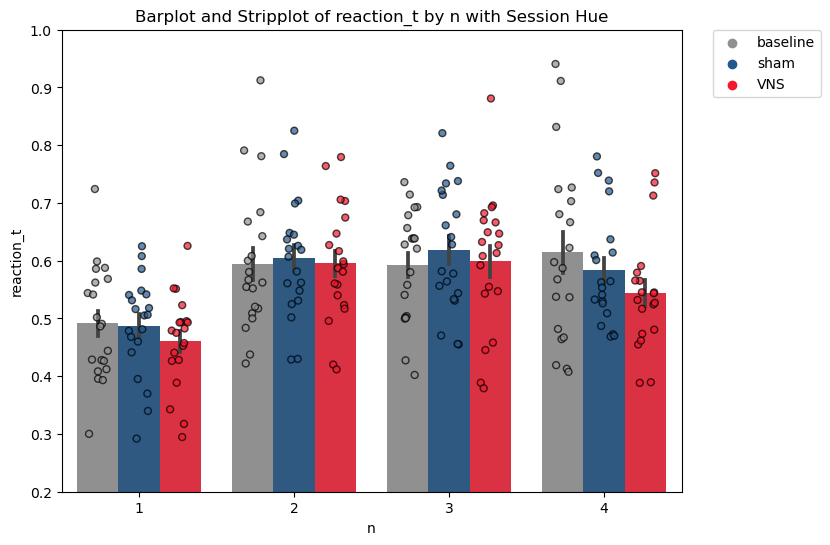

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


session_order = ['baseline', 'sham', 'VNS']
session_palette = {
    'VNS': '#F6162C',
    'sham': '#22598D',
    'baseline': '#909090'
}

fig = plt.figure(figsize=(8,6))


sns.barplot(data=df_selected_n, x='n', y='reaction_t', hue='session', hue_order=session_order, palette=session_palette,  
            errorbar='se')

sns.stripplot(data=df_selected_n, x='n', y='reaction_t', hue='session', hue_order=session_order, palette=session_palette,
              dodge=True, jitter=0.2, marker='o', alpha=0.7, edgecolor='black', linewidth=1)

plt.ylim([0.2, 1])

handles, labels = plt.gca().get_legend_handles_labels()
l = plt.legend(handles[0:len(session_order)], labels[0:len(session_order)], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Barplot and Stripplot of reaction_t by n with Session Hue')
plt.show()


## Figure 3c and 3d (run in R kernel)
- change dprime to reaction_time

In [ ]:
df_filename = 'performance_sum.txt'
df = read.table(df_filename,sep=",", header=TRUE)
df <- df[df$n %in% c(1, 2, 3, 4), ]

library(lme4)
library(lmerTest)
model_1 <- lmer(dprime ~ n * session + order + (1 | subj_id), data = df, REML = FALSE)
print(summary(model_1))


coef_data <- summary(model_1)$coefficients


coef_df <- data.frame(
  term = rownames(coef_data),
  estimate = coef_data[, "Estimate"],
  lower = coef_data[, "Estimate"] - 1.96 * coef_data[, "Std. Error"], # For 95% CI
  upper = coef_data[, "Estimate"] + 1.96 * coef_data[, "Std. Error"] # For 95% CI
)
coef_df <- coef_df[-1, ]
coef_df <- coef_df[c(5,2,3, 6,4,1), ] 
coef_df$term <- factor(coef_df$term, levels = coef_df$term)
# Plotting
fig = ggplot(coef_df, aes(x=term, y=estimate)) + 
  geom_point() +
  geom_errorbar(aes(ymin=lower, ymax=upper), width=0.2) +
  coord_flip() +  # Flips the axes for better visualization
  theme_minimal() +
  labs(title="Coefficients with 95% Confidence Intervals", y="Estimate", x="")
